<a href="https://colab.research.google.com/github/ryaltic/Spaceship-Titanic-Kaggle/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spaceship Titanic Kaggle

This file contains the code used to predict whether someone will be transportated or not. There were ton of features that were added into the file to help prediction performance. On top of that, imputations were used to have a complete dataset. Functions were used to apply the transformation onto the training, testing, and unseen data for ease of use. The final result had accuracy scores around 80% which is good given the context.

## Read in the file and Explore the data

In [1]:
# Loading in the pandas package
import pandas as pd

In [2]:
# Reading in the csv file from my github and displaying the info
df = pd.read_csv('https://raw.githubusercontent.com/ryaltic/Spaceship-Titanic-Kaggle/refs/heads/main/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Total of 13 columns including the response variable. There is a good mix of numeric and categorical variables. There seems to be missing observations in most of the columns, however, no major missing columns.

In [3]:
# Displaying the first 10 rows of the dataframe
df.head(n=10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


Looking at the first couple of rows, it seems that Name will not be to useful in predicting if someone is transporated or not also the PassengerID will be dropped but after some grouping variables are made. Also, some of the categorical columns needs to be investigated to see if it needs to be collapsed or changed at all. The cabin column can also be split up into more intrepretable columns.

In [4]:
# Checking to see if the PassengerID is unique or not
df['PassengerId'].is_unique
# It is unique

True

## Train and Test Splitting

In [5]:
# Importing the necessary package from SciKit Learn
from sklearn.model_selection import train_test_split

# Dropping the response variable for the X dataset
X = df.drop(columns=['Transported'])
# Only keeping the reponse variable for the Y dataset
y = df['Transported']

# Creating a X_train, X_test, y_train, y_test datasets to use for testing the different models to use
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2, # Having a 80/20% split
    random_state=18 # Setting the seed to 18
)



## Feature Engineering and EDA

In [6]:
# Creating a function the takes the first four characters of PassengerID and drops PassengerID
def add_passenger_group(df):
    df = df.copy() # Copying the df to avoid mutating the original df

    df['PassengerGroup'] = df['PassengerId'].str[:4]
    df = df.drop(columns=['PassengerId'])

    return df # Returning the df at the end

# Applying the function to the X datasets
X_train = add_passenger_group(X_train)
X_test  = add_passenger_group(X_test)

In [7]:
# Creating a function that finds all of the duplicate names in the dataset
def get_duplicate_name_counts(df, name_col='Name'):
    name_counts = df[name_col].value_counts() # Using value_counts() instead of group_by()
    return name_counts[name_counts > 1]

# Applying the function to the X datasets
train_dupes = get_duplicate_name_counts(X_train)
test_dupes  = get_duplicate_name_counts(X_test)

# Printing out the Duplicates
print(train_dupes)
print(test_dupes)


Name
Glenna Valezaley      2
Apix Wala             2
Elaney Webstephrey    2
Keitha Josey          2
Alraium Disivering    2
Glena Hahnstonsen     2
Troya Schwardson      2
Sharie Gallenry       2
Asch Stradick         2
Cuses Pread           2
Ankalik Nateansive    2
Sus Coolez            2
Name: count, dtype: int64
Name
Gwendy Sykess    2
Name: count, dtype: int64


In [8]:
# Creating a function that get the rows with duplicate to see if it is a duplicate row or not
def get_rows_with_duplicate_names(df, name_col='Name'):
    name_counts = df[name_col].value_counts()
    dupe_names = name_counts[name_counts > 1].index

    return (
        df[df[name_col].isin(dupe_names)]
        .sort_values(name_col)
    )

# Applying the function to the X datasets
train_dupe_rows = get_rows_with_duplicate_names(X_train)
test_dupe_rows  = get_rows_with_duplicate_names(X_test)

# Printing the rows with the duplicates
print(train_dupe_rows)
print(test_dupe_rows)


     HomePlanet CryoSleep     Cabin    Destination   Age    VIP  RoomService  \
6296     Europa      True   B/222/P    55 Cancri e  17.0  False          0.0   
7270     Europa     False   C/253/P    55 Cancri e  28.0  False          7.0   
476      Europa      True    D/18/S    TRAPPIST-1e  55.0  False          0.0   
2930     Europa     False   E/196/P    TRAPPIST-1e  77.0  False          0.0   
2559       Mars     False   F/569/P    TRAPPIST-1e  52.0  False        758.0   
4108       Mars     False   F/902/P  PSO J318.5-22  32.0  False        192.0   
6086     Europa     False   D/202/P    55 Cancri e  55.0  False        114.0   
7871     Europa      True   B/329/S    TRAPPIST-1e  15.0  False          0.0   
6171       Mars     False  F/1244/S    TRAPPIST-1e  20.0  False         57.0   
6987       Mars     False       NaN    TRAPPIST-1e  38.0  False       1126.0   
156       Earth     False    G/26/P    TRAPPIST-1e  19.0  False          1.0   
956       Earth      True   G/150/P    T

The duplicate names seem to be different people who happen to have the same names as the ages are different as well as other features. The rows with duplicate names will be kept because of this.

In [9]:
# Dropping the Name column for the training dataset
X_train.drop(columns=['Name'], inplace=True)
X_train.head()

# Dropping the Name column for the testing dataset
X_test.drop(columns=['Name'], inplace=True)
X_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup
3176,Earth,False,E/233/S,TRAPPIST-1e,37.0,False,190.0,0.0,2.0,799.0,0.0,3424
8315,Europa,False,B/287/P,55 Cancri e,44.0,False,0.0,71.0,7148.0,427.0,394.0,8876
8471,Earth,True,G/1471/P,TRAPPIST-1e,54.0,False,0.0,0.0,0.0,0.0,0.0,9048
3438,Mars,False,F/770/P,TRAPPIST-1e,18.0,False,131.0,0.0,980.0,1.0,0.0,3706
2880,Mars,False,D/97/P,TRAPPIST-1e,50.0,False,1598.0,0.0,155.0,26.0,0.0,3114


In [10]:
# Grouping by HomePlanet and seeing the counts for each home plant and seeing how many home planets there are in the dataset
X_train.groupby('HomePlanet').count() # Using groupby() and count()
X_test.groupby('HomePlanet').count()

,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup
HomePlanet,,,,,,,,,,,
Earth,886,889,895,892,889,887,890,897,897,887,912
Europa,425,427,431,428,428,427,426,431,431,435,437
Mars,331,330,337,330,333,334,335,334,335,330,341


There are only three home planets a person can be from meaning that there is no need to collapse this variable or make any changes to this variable. Also, the most popular home planet is earth with over 900 people while Europa and Mars are roughly the same in terms of count with around 400 people for both planets. The distribution shows no major problem as every group has a good amount of observations in it.

In [11]:
# Grouping by Destination and seeing the amount of destination planets there are and how many observations each destination planet has
X_train.groupby('Destination').count()
X_test.groupby('Destination').count()

,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup
Destination,,,,,,,,,,,
55 Cancri e,369,371,369,371,368,368,367,373,373,374,377
PSO J318.5-22,145,146,148,148,146,146,150,148,147,146,151
TRAPPIST-1e,1149,1145,1148,1152,1157,1153,1155,1160,1164,1154,1183


There are three destination planets that someone can go to. There is no need to collapse this variable at all. TRAPPIST-1e is by far the most popular destination planet with over 1000 people wanting to go there which is then followed by 55 Cancri e with roughly 400 people and lastly PSO J319.5-22 with only 150 people. The distribution should be fine so this variable will remain untouched

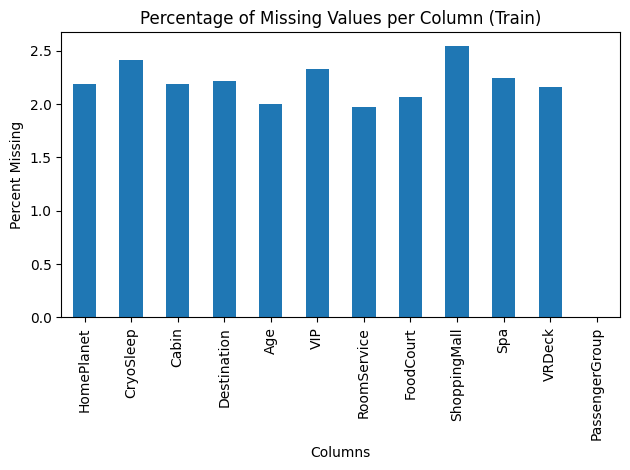

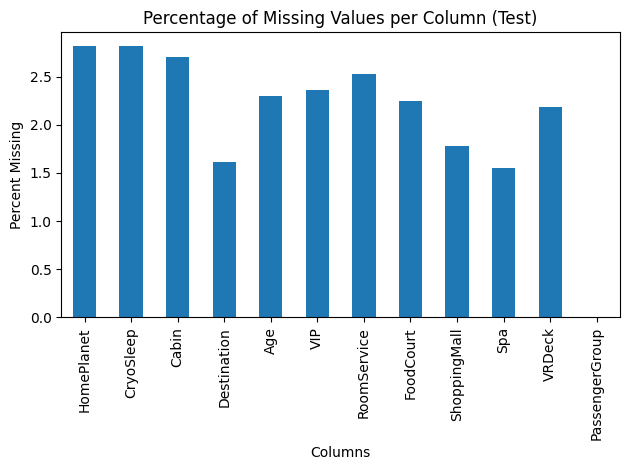

In [12]:
# Importing matplotlib.pyplot to make visualizations to explore the data
import matplotlib.pyplot as plt

# Creating a function that looks at the missing pct for each column
def plot_missing_percentages(df, title=""):
    missing_pct = df.isna().mean() * 100 # Getting the missing pct in the df

    missing_pct.plot(kind='bar') # Making it a bar chart
    plt.title(f"Percentage of Missing Values per Column {title}") # Title
    plt.ylabel("Percent Missing") # Y label
    plt.xlabel("Columns") # X label
    plt.tight_layout()
    plt.show() # Showing the plot

# Using the function for both X datasets
plot_missing_percentages(X_train, "(Train)")
plot_missing_percentages(X_test, "(Test)")



Both the train and the test dataset has missing observations in almost every column. But the missing observation percent is fairly small and can be imputed with median imputation or mode imputation. In order to have a complete dataset it is important to have no missing data.

In [13]:
# Creating a list of the column names that have missing pct
missing_cols = [
    'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
    'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'
]

# Creating a variable that sees if a row has any missing data before imputing it
X_train['Any_Missing'] = X_train[missing_cols].isna().any(axis=1).astype(int)
X_test['Any_Missing']  = X_test[missing_cols].isna().any(axis=1).astype(int)



In [14]:
# Cabin - Deck/Num/Side
# Do not need Num due to it having no individual meaning
# Making a function that splits the cabin variable into the deck and side
def split_cabin(df):
    df = df.copy()

    df['Deck'] = df['Cabin'].str.split('/').str[0] # 1st character is the deck
    df['Side'] = df['Cabin'].str.split('/').str[2] # 3rd character is the side
    df = df.drop(columns=['Cabin']) # dropping the cabin column after

    return df

# Applying the function to the X dataframes
X_train = split_cabin(X_train)
X_test  = split_cabin(X_test)


In [15]:
# Importing the SimpleImputer from SciKit Learn
from sklearn.impute import SimpleImputer

# Selected only numeric columns and assigned it to a new df
numeric_cols = X_train.select_dtypes(include="number").columns

# Creating an imputer object with median imputation
num_imputer = SimpleImputer(strategy="median")

# Imputating the missing values with the median for both X datasets
X_train[numeric_cols] = num_imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = num_imputer.transform(X_test[numeric_cols]) # no fit_ because want to use train median not test

# Getting the categorical columns and assigning it to a new df
cat_cols = X_train.select_dtypes(include=["object", "category", "bool"]).columns
cat_cols = cat_cols.drop('PassengerGroup', errors='ignore') # dropping PassengerGroup as it has no missing values and will be dropped soon

# Using mode imputation to impute
cat_imputer = SimpleImputer(strategy="most_frequent")

X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols]) # no fit_ because want to use train mode not test


Used median imputation for numeric columns and mode imputation for categorical columns. Fairly basic imputation strategy however, due to the low missing value percent it will be fine. Made sure to make sure no data leakage occured and used the train median/mode to impute on the test set.  

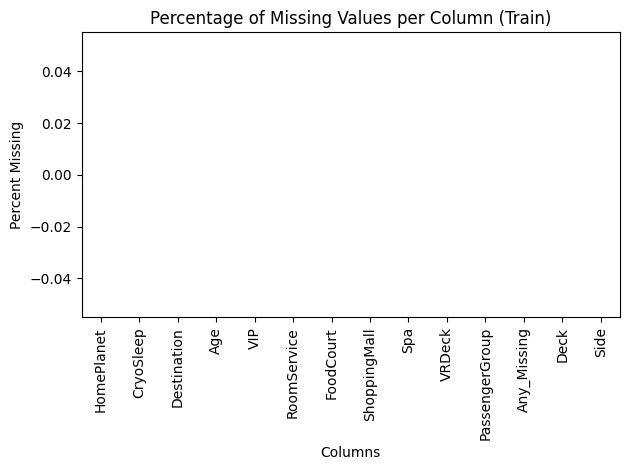

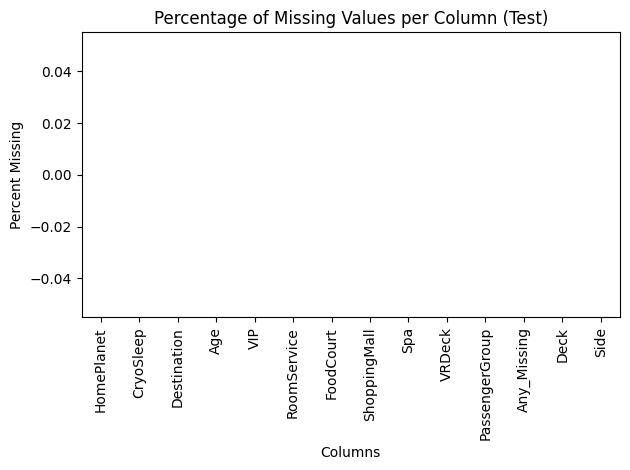

In [16]:
# Checking to see if there are any missing values left after imputation
# Using the function created earlier to check missing value pct
plot_missing_percentages(X_train, "(Train)")
plot_missing_percentages(X_test, "(Test)")


There are no missing values left after imputation meaning missing values are no longer a issue

In [17]:
# Making a function that groupby a column and adds group variables and then drops the column used to group
def add_group_sum_features(df, group_col, bool_cols, drop_group_col=True):
    df = df.copy()

    for col in bool_cols: # using a for loop for each column in bool column
        df[f"group_{col}"] = ( # variable name
            df.groupby(group_col)[col] # grouping by the group_col
              .transform(lambda x: x.astype(int).sum()) # summing to see how many in each group
        )

    if drop_group_col: # drops the group column as it has no predictive power
        df = df.drop(columns=[group_col])

    return df

# Defining the bool_cols
bool_cols = ['VIP', 'CryoSleep']

# Apply the function to both X datasets by defining the df, group_col, and bool_col
X_train = add_group_sum_features(
    X_train,
    group_col='PassengerGroup',
    bool_cols=bool_cols
)

X_test = add_group_sum_features(
    X_test,
    group_col='PassengerGroup',
    bool_cols=bool_cols
)


In [18]:
# Creating a function that adds a total spend column by adding the columns that have money value in it
def add_total_spend(df):
    df = df.copy()

    spend_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] # spending columns
    df['TotalSpend'] = df[spend_cols].sum(axis=1) # summing the spend_cols

    return df

# Applying the function to the X datasets
X_train = add_total_spend(X_train)
X_test  = add_total_spend(X_test)



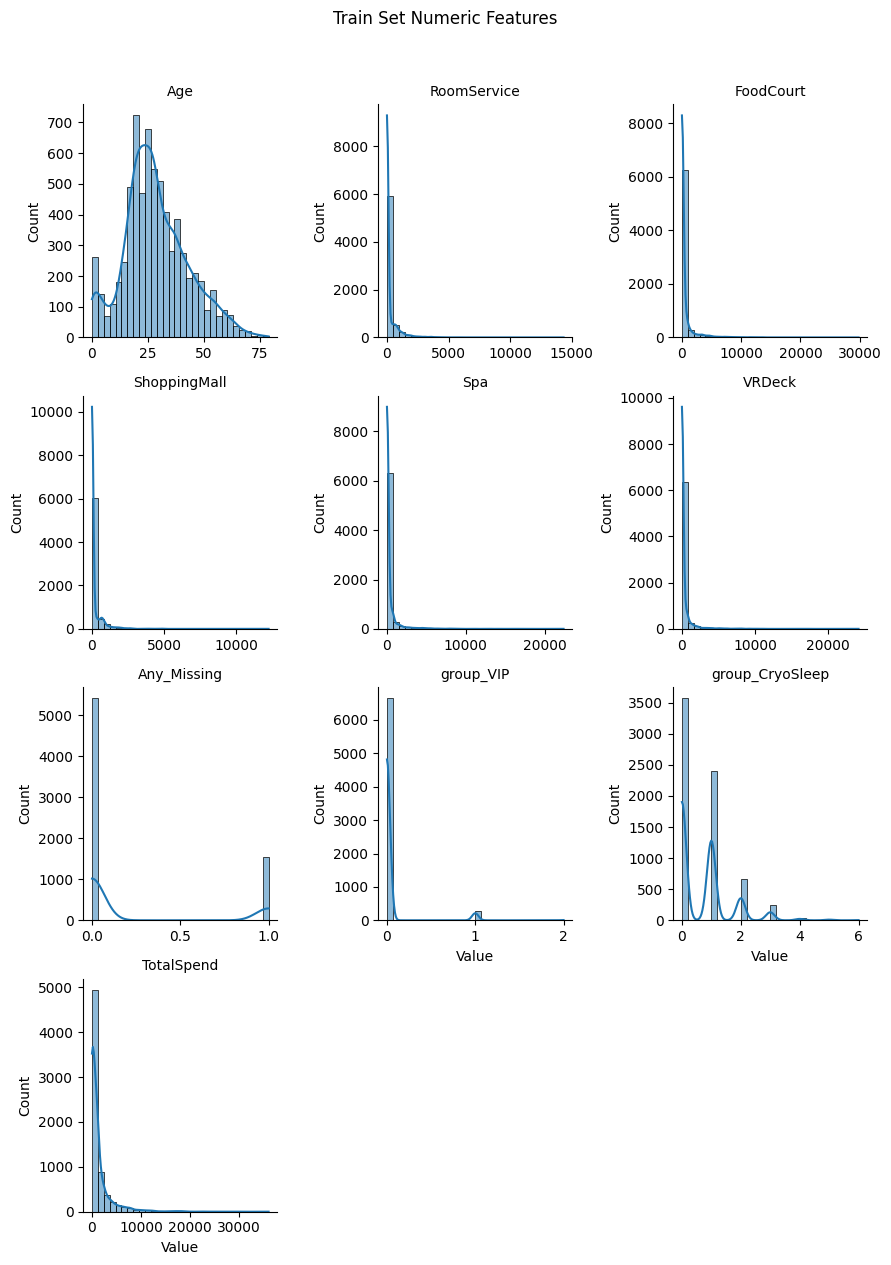

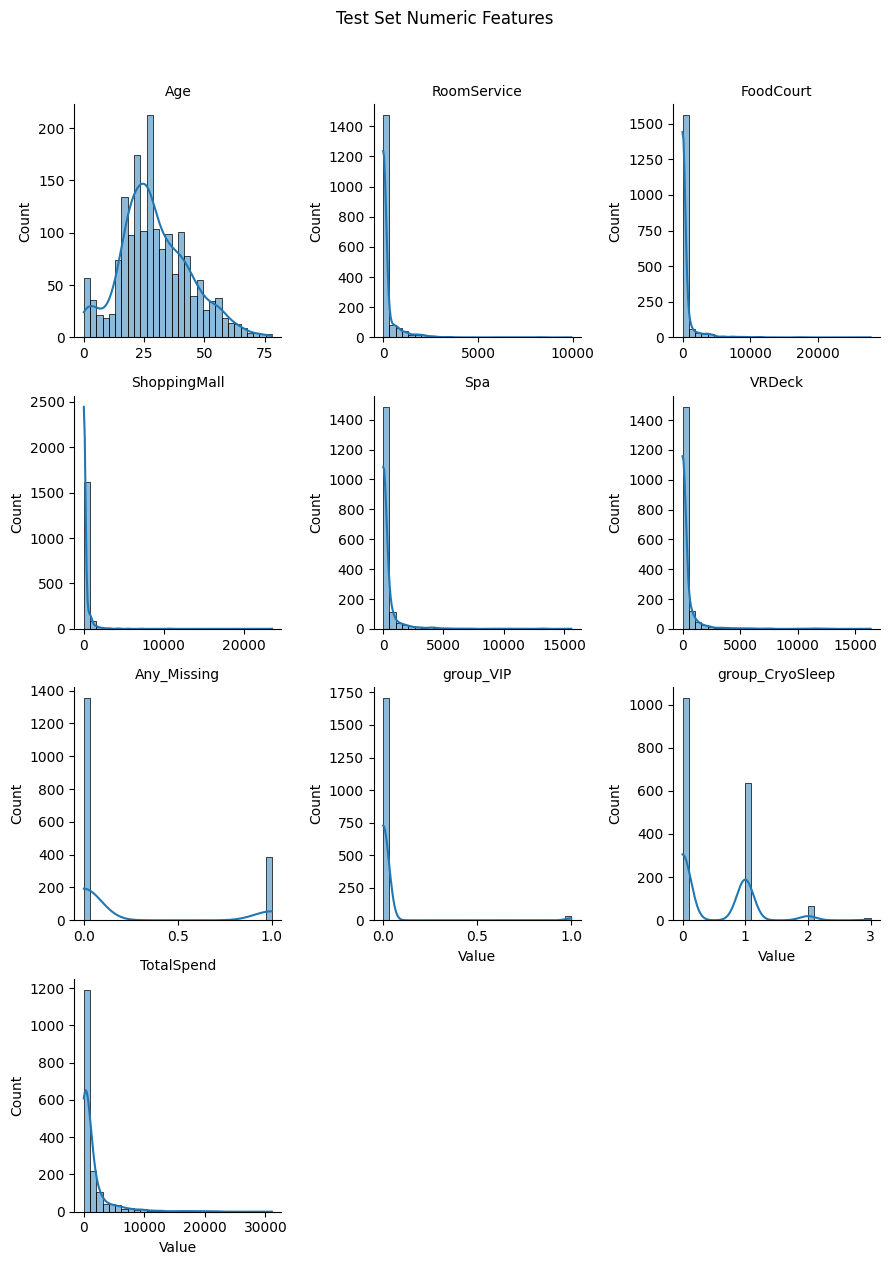

In [19]:
# Importing seaborn package for this visualization
import seaborn as sns

# Creating a numerical distribution plot function with col_wrap = 3 and bins = 30
def plot_numeric_distributions(df, title="Distribution of Numeric Features", col_wrap=3, bins=30, kde=True):
    numeric_columns = df.select_dtypes(include="number") # selecting only numeric columns
    if numeric_columns.empty: # error checking
        print("No numeric columns found.")
        return
    # Melting the columns
    df_long = numeric_columns.melt(var_name="Feature", value_name="Value")

    # Making a facetgrid to display all of the numeric columns
    g = sns.FacetGrid( # assigning the facetgrid to g
        df_long, # using the melted df
        col="Feature",
        col_wrap=col_wrap,
        sharex=False,
        sharey=False
    )

    g.map(sns.histplot, "Value", bins=bins, kde=kde) # using seaborn histogram
    g.set_titles("{col_name}")
    g.fig.suptitle(title, y=1.05)

    plt.show() # showing the plot

# Apply the function to both X datasets
plot_numeric_distributions(X_train, title="Train Set Numeric Features")
plot_numeric_distributions(X_test, title="Test Set Numeric Features")



From these plots, it is clear that most of the columns are right skewed and there are some outliers in the columns that could hurt performance. There were barely any VIPs in either of the datasets and not a lot of people with more than 1 cryosleep in their group. It may be worth limiting the outliers or investigating the outliers or evening creating binned variables. Another thing that can be done is applying transformation to the response or the predicator variables to help increase performance. Overall looking at this plot provided valuable information.

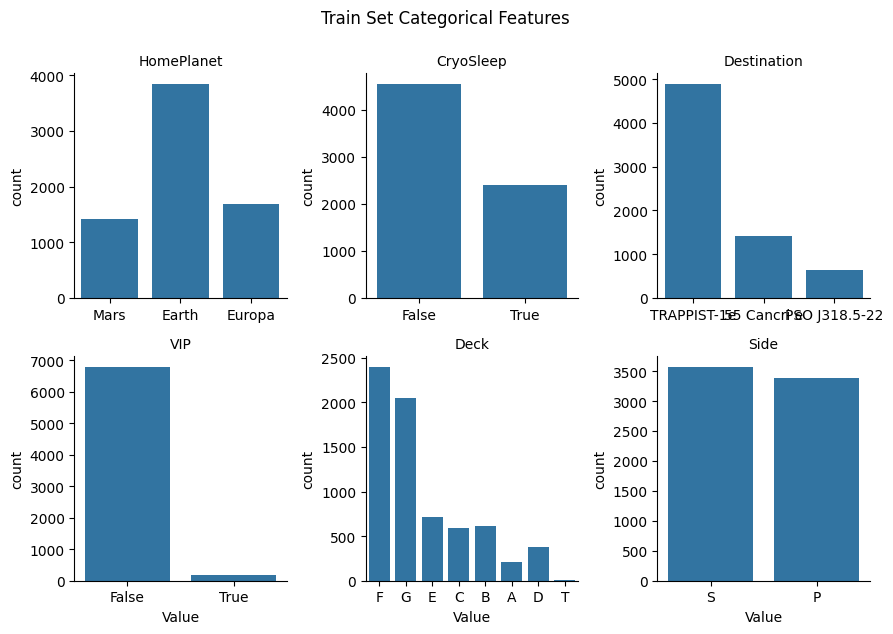

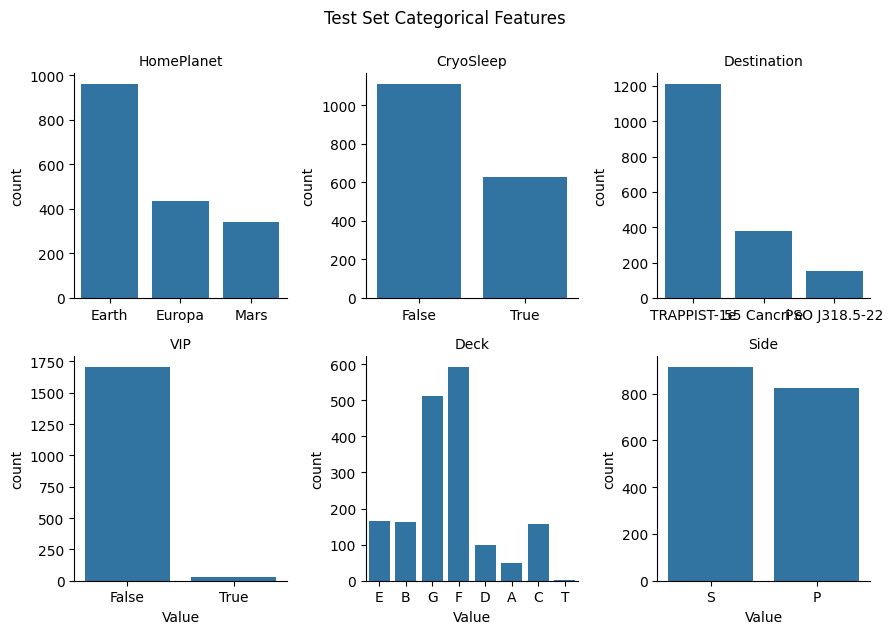

In [20]:
# Creating a function of categorical distribution for each variable
def plot_categorical_counts(df, title="Counts of Categorical Features", col_wrap=3):
    cat_columns = df.select_dtypes(include=["object", "category", "bool"]) # including variables with object, category, bool variable type
    if cat_columns.empty: # error checking
        print("No categorical columns found.")
        return
    # Melting the columns
    df_long = cat_columns.melt(var_name="Feature", value_name="Value")

    # Making a FacetGrid for all of the categorical variables
    g = sns.FacetGrid( # assigning the facetgrid to g
        df_long, # using the melted df
        col="Feature",
        col_wrap=col_wrap,
        sharex=False,
        sharey=False
    )

    g.map(sns.countplot, "Value", order=None) # using the count feature in sns
    g.set_titles("{col_name}")
    g.fig.suptitle(title, y=1.05)

    plt.show()

# Applying the function to the X datasets
plot_categorical_counts(X_train, title="Train Set Categorical Features")
plot_categorical_counts(X_test, title="Test Set Categorical Features")



As stated before, the home planet and destination are fairly good in terms of distribution for both datasets. The VIP are extremely one sided with most people being False for both datasets but the column will be kept because it could still be a key predicator in determing if someone is transportated or not. Side is basically evenly distributed and Deck has a decent distribution along with cryosleep for both datasets.

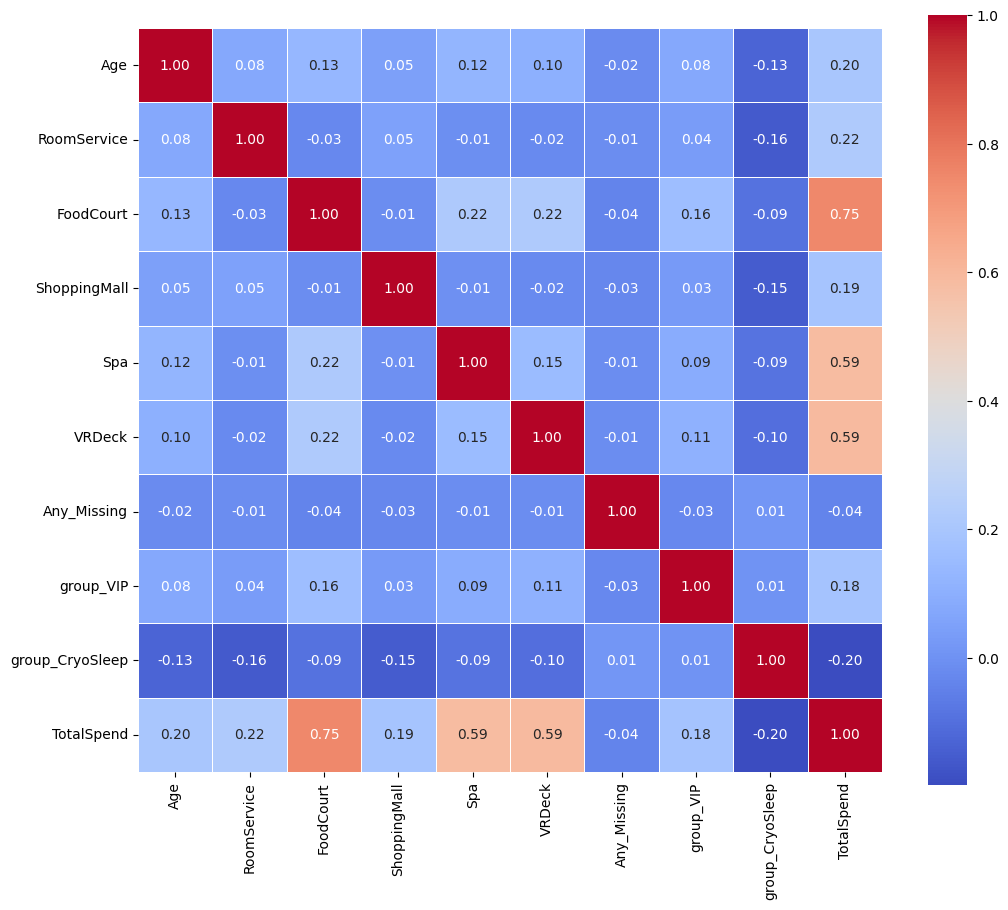

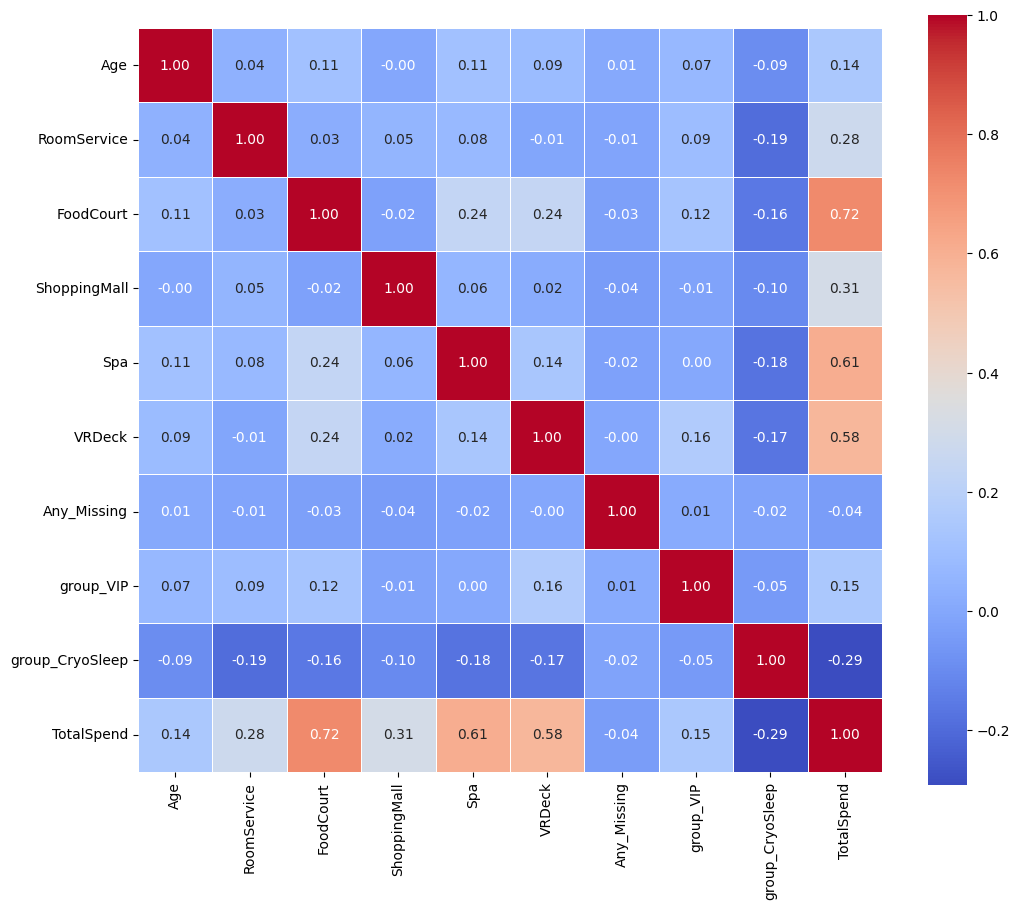

In [21]:
# Making a function to plot a correlation matrix for all the numeric features
def plot_correlation_matrix(df, title="Correlation Matrix (Numeric Features)", figsize=(12, 10), cmap="coolwarm"):
    numeric_columns = df.select_dtypes(include="number") # selecting only numeric columns
    if numeric_columns.empty: # error checking
        print("No numeric columns found.")
        return
    # Getting the correlation between the numeric columns and assigning it to corr
    corr = numeric_columns.corr()
    plt.figure(figsize=figsize) # using the figsize specifed above
    sns.heatmap(
        corr, # using corr
        annot=True, # show the value on the plot
        fmt=".2f", # 2 decimal places
        cmap=cmap, # color scheme
        square=True, # making it a square
        cbar=True, # color bar legend
        linewidths=0.5 # line width
    )
    plt.title # using the title specifed above

# Applying the function to the X datasets
plot_correlation_matrix(X_train, title="Train Set Numeric Correlations")
plot_correlation_matrix(X_test, title="Test Set Numeric Correlations")


Total Spend is highly correlated with many features, however, it makes sense as total spend is a combination of those features that it is highly correlated with. Total spend will be kept in knowing that knowledge and that it is still below a 0.8 threshold. Other than that, no major issues with correlation.

## Modelling

In [22]:
# Making all of the categorical columns into dummies so that modelling can run and assigning it to a new df
X_train_dummies = pd.get_dummies(X_train, columns=cat_cols, drop_first=False)
X_test_dummies  = pd.get_dummies(X_test, columns=cat_cols, drop_first=False)

# Aligning the X train and X test dummies together
X_train_dummies, X_test_dummies = X_train_dummies.align(X_test_dummies, join='left', axis=1)


In [23]:
# Importing a bunch of packages from Sci-Kit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [24]:
# Getting the column names
num_cols = X_train.select_dtypes(include='number').columns

# Using the StanardScaler to scale all of the numeric columns
scaler = StandardScaler()

# Making a new df for the scaled df
X_train_scaled = X_train_dummies.copy()
X_test_scaled  = X_test_dummies.copy()

# Scaling all numeric columns with the scaler made above
X_train_scaled[num_cols] = scaler.fit_transform(X_train_dummies[num_cols]) # using fit_transform
X_test_scaled[num_cols]  = scaler.transform(X_test_dummies[num_cols]) # using transform so that train scaler is being applied


Scaling the data so that the data can all be on a 0 to 1 scale so that the models can run faster and one column that has huge numbers don't dominate the models. Also, this might help with outlier issue.

### Logistic Regression

In [25]:
# Importing logistic regression model from Sci-Kit Learn
from sklearn.linear_model import LogisticRegression

# Initializing a basic logistic regression
logit = LogisticRegression(
    max_iter=1000, # max number iterations of 1000 so that it doesn't take too long
    solver='lbfgs', # using lbfgs for the solver
    random_state=18 # using a seed of 18
)

# Fitting the scaled data and the y train
logit.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=18)

In [26]:
# Creating a small grid
param_grid = {
    "penalty": ["l1", "l2"], # either l1 (lasso) regression or l2 (ridge) regression
    "C": [0.001, 0.01, 0.1, 1, 10, 100], # the penalty on regularization strength (high is weak, low is strong)
    "solver": ["liblinear"]  # changing the solver as liblinear supports both l1 and l2
}

# Defining the grid
grid = GridSearchCV(
    estimator=logit, # using the basic logistic regression
    param_grid=param_grid, # using the param grid defined above
    scoring="accuracy", # using accuracy as that is the metric to evaluate the unseen data
    cv=5, # 5-fold
    n_jobs=-1, # could remove if needed
    verbose=1  # could remove if needed
)

# fitting the train data
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=18),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [28]:
# Printing the best paramaters combination and the score for accuracy
print(grid.best_params_)
print(grid.best_score_)


{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
0.7865986376966004


The final paramater grid had a moderate regularization penalty of 1 and it uses ridge penalty while using the liblinear solver that was specified as the only option above. The final accuracy score was .787 which is solid for a logistic regression

In [29]:
# Importing accuracy score, classification report, and confusion matrix from Sci-Kit Learn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assigning the best esimators to the best_log_reg to use later
best_log_reg = grid.best_estimator_

# Applying the best logistic regression to predict on the test data
y_test_pred = best_log_reg.predict(X_test_scaled)

# Printing the accuracy score on the test dataset along with the classification report and confusion matrix
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))



0.8079355951696378
              precision    recall  f1-score   support

       False       0.83      0.77      0.80       880
        True       0.78      0.84      0.81       859

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739

[[681 199]
 [135 724]]


The test dataset had an accuracy of 0.808 which is even better than the cross validation accuracy. It does well overall with True Positive and True Negatives with the model doing slightly better identifying the True Negatives.

In [30]:
# Showing the most important variables in the logistic model
# AI generated code below
coef_df = (
    pd.DataFrame({
        'feature': X_train_scaled.columns,
        'coef': logit.coef_[0]
    })
    .assign(abs_coef=lambda x: x.coef.abs())
    .sort_values('abs_coef', ascending=False)
)

coef_df.head(15)


,feature,coef,abs_coef
4,Spa,-1.821389,1.821389
5,VRDeck,-1.704144,1.704144
22,Deck_C,1.601828,1.601828
2,FoodCourt,1.207766,1.207766
11,HomePlanet_Europa,0.883572,0.883572
20,Deck_A,-0.881783,0.881783
9,TotalSpend,-0.839123,0.839123
1,RoomService,-0.785561,0.785561
10,HomePlanet_Earth,-0.727299,0.727299
13,CryoSleep_False,-0.693046,0.693046


Spending variables and Deck letter seems to be very important in this model.

### Random Forest

In [31]:
# Importing Random Forest packages from Sci-Kit Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initalizing a base random forest model
rf_base = RandomForestClassifier(
    n_estimators=200, # base of 200 estimators
    random_state=18, # seed of 18
    n_jobs=-1 # can delete
)

# Getting a baseline accuracy based on the training dataset
cv_scores = cross_val_score(
    rf_base,
    X_train_dummies, # using the dummies data and not the scaled data
    y_train,
    cv=5, # 5-fold
    scoring="accuracy"
)

print(cv_scores.mean())


0.788181992148912


The accuracy is very similar to the logistic regression and it gives a good baseline to see how much the accuracy improves after apply tuning.

In [32]:
# Making a tuning grid for the random forest model
param_grid = {
    "n_estimators": [150, 175], # after tuning it was narrowed down to one of these values for number of trees in the model
    "max_depth": [None], # after tuning it was found that a max_depth of none was the best
    "min_samples_split": [2, 3, 4], # the min number of samples to split an internal node was between these three values
    "min_samples_leaf": [4, 5, 6], # the min number of samples required at a leaf node
    "max_features": ["sqrt", "log2"], # how the number of features are considered
    "max_samples": [None, 0.6, 0.8] # max number of samples of the data to use
}

# Defining the grid
grid_search = GridSearchCV(
    estimator=rf_base, # using the base rf
    param_grid=param_grid, # using the param_grid defined above
    scoring="accuracy", # using accuracy
    cv=5, # 5-fold
    n_jobs=-1, # don't need, could delete
    verbose=2 # don't need, could delete
)

# Fitting the grid on the training data
grid_search.fit(X_train_dummies, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=200, n_jobs=-1,
                                              random_state=18),
             n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': ['sqrt', 'log2'],
                         'max_samples': [None, 0.6, 0.8],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [150, 175]},
             scoring='accuracy', verbose=2)

In [33]:
# Printing the best parameter for the random forest model and the accuracy score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': None, 'max_features': 'sqrt', 'max_samples': 0.8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 175}
0.8034235501605904


The accuracy score based on the training dataset for the random forest is 0.803. It improved by 0.02 compared to the baseline random forest model. The parameter grid that will be used is a max depth of none, max features of sqrt, max samples of 0.8, a min samples leaf of 4, a min samples split of 2, and n esimators of 175.

In [34]:
# Using the estimators from the tuning random forest and assigning it to the best_rf
best_rf = grid_search.best_estimator_

# Using the best_rf to predict on the test set
y_pred = best_rf.predict(X_test_dummies)

# Printing the accuracy score along with the classification report and confusion matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


0.8171362852213916
              precision    recall  f1-score   support

       False       0.82      0.82      0.82       880
        True       0.81      0.82      0.82       859

    accuracy                           0.82      1739
   macro avg       0.82      0.82      0.82      1739
weighted avg       0.82      0.82      0.82      1739

[[718 162]
 [156 703]]


The test data has a accuracy of 0.817 which out performed the logistic regression model by 0.15 and does a great job at identifying the True Positives and True Negatives.

In [35]:
# Generated by AI
importances = pd.Series(
    best_rf.feature_importances_,
    index=X_train_dummies.columns
).sort_values(ascending=False)

importances.head(15)


,0
TotalSpend,0.154637
Spa,0.092702
FoodCourt,0.090720
RoomService,0.087777
CryoSleep_False,0.079990
Age,0.079630
VRDeck,0.078428
ShoppingMall,0.070002
CryoSleep_True,0.051181
group_CryoSleep,0.046831


The most important variables in the final random forest model were spending variables, deck letter, cryosleep variables, and the home planet.

### XGBoost

In [ ]:
# Need to install the xgboost package and import the XGBClassifer from that library to use XGBoost
!pip install xgboost
from xgboost import XGBClassifier

In [ ]:
# Creating a base XGBoost model
xgb_base = XGBClassifier(
    objective="binary:logistic", # telling the model that it is a classification response variable
    eval_metric="logloss", # using logloss for eval metric
    n_estimators=300, # 300 trees
    learning_rate=0.05, # penalty for xgboost
    max_depth=6, # the max depth is 6
    subsample=0.8, # using 80% of the sample
    colsample_bytree=0.8, # 80% of features used for each tree
    random_state=18, # seed
    n_jobs=-1 # don't need, could delete, cores
)


In [ ]:
# Redoing the group binary columns due to it not being the right type
binary_cols = ['group_VIP', 'group_CryoSleep']

# Using a for loop to fix the issue
# Converts True/False to 1 and 0
for col in binary_cols:
    X_train_dummies[col] = (
        X_train_dummies[col]
        .astype(str)
        .str.lower()
        .map({'true': 1, 'false': 0})
    )

    X_test_dummies[col] = (
        X_test_dummies[col]
        .astype(str)
        .str.lower()
        .map({'true': 1, 'false': 0})
    )


In [1]:
# Fitting the baseline XGBoost on the training data
xgb_base.fit(X_train_dummies, y_train)

# Predicting on the test set
y_pred = xgb_base.predict(X_test_dummies)
print("Baseline Accuracy:", accuracy_score(y_test, y_pred))


NameError: name 'xgb_base' is not defined

Write up

In [ ]:
# Defining a Paramater grid to tune the XGBoost model
param_grid = {
    "n_estimators": [335, 337], # number of trees to use
    "learning_rate": [0.0535, 0.0525], # the penalty to use for the model
    "max_depth": [4], # the max depth a tree can go
    "subsample": [0.725, 0.75, 0.775], # the percent of the sample used for each tree
    "colsample_bytree": [0.825, 0.85, 0.875] # the percent of columns used for each tree
}


In [ ]:
# Searching for the best combination of the parameters listed above to produce the best accuracy
grid_search = GridSearchCV(
    estimator=xgb_base, # using the base model
    param_grid=param_grid, # using the parameter grid defined above
    scoring="accuracy", # using accuracy due to the unseen data being scored on accuracy
    cv=5, # 5-fold
    n_jobs=-1, # cores
    verbose=2 # explaining the process
)

# Fitting the tune grid on the training data
grid_search.fit(X_train_dummies, y_train)


In [ ]:
# Pring the crossvalidation accuracy and parameters used
print(grid_search.best_score_)
print(grid_search.best_params_)

Write up

In [ ]:
# Assigning the best values for the parameters to the model
best_xgb = grid_search.best_estimator_

# Using the best values for the parameters to predict on the test data
y_pred = best_xgb.predict(X_test_dummies)

# Printing out the accuracy score, classification report, and the confusion matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


In [ ]:
# Showing the most important variable in the XGBoost model
# Generated by AI
importance = pd.Series(
    best_xgb.feature_importances_,
    index=X_train_dummies.columns
).sort_values(ascending=False)

importance.head(20)


Write up

## Unseen Data

In [ ]:
test_data = pd.read_csv("https://raw.githubusercontent.com/ryaltic/Spaceship-Titanic-Kaggle/refs/heads/main/test.csv")
test_df = test_data.copy()
test_df.head()

In [ ]:
test_df = add_passenger_group(test_df)

get_duplicate_name_counts(test_df)

get_rows_with_duplicate_names(test_df)

test_df = test_df.drop(columns=['Name'], axis=1)

plot_missing_percentages(test_df)

test_df['Any_Missing']  = test_df[missing_cols].isna().any(axis=1).astype(int)

test_df = split_cabin(test_df)

test_df[numeric_cols] = num_imputer.transform(test_df[numeric_cols])

test_df[cat_cols] = cat_imputer.transform(test_df[cat_cols])

plot_missing_percentages(test_df)

test_df = add_group_sum_features(
    test_df,
    group_col='PassengerGroup',
    bool_cols=bool_cols
)

test_df = add_total_spend(test_df)

plot_numeric_distributions(test_df)

plot_categorical_counts(test_df)

plot_correlation_matrix(test_df)

test_df_dummies = pd.get_dummies(
    test_df,
    columns=cat_cols,
    drop_first=False
)

# align columns to training set
test_df_dummies = test_df_dummies.reindex(
    columns=X_train_dummies.columns,
    fill_value=0
)

test_df_scaled = test_df_dummies.copy()

test_df_scaled[num_cols] = scaler.transform(test_df_dummies[num_cols])


binary_cols = ['group_VIP', 'group_CryoSleep']

for col in binary_cols:
    test_df_dummies[col] = (
        test_df_dummies[col]
        .astype(str)
        .str.lower()
        .map({'true': 1, 'false': 0})
    )


In [ ]:
# Should delete
test_df[numeric_cols] = num_imputer.transform(test_df[numeric_cols])

test_df[cat_cols] = cat_imputer.transform(test_df[cat_cols])

plot_missing_percentages(test_df)

test_df = add_group_sum_features(
    test_df,
    group_col='PassengerGroup',
    bool_cols=bool_cols
)

test_df = add_total_spend(test_df)

plot_numeric_distributions(test_df)

plot_categorical_counts(test_df)

plot_correlation_matrix(test_df)

test_df_dummies = pd.get_dummies(
    test_df,
    columns=cat_cols,
    drop_first=False
)

# align columns to training set
test_df_dummies = test_df_dummies.reindex(
    columns=X_train_dummies.columns,
    fill_value=0
)

test_df_scaled = test_df_dummies.copy()

test_df_scaled[num_cols] = scaler.transform(test_df_dummies[num_cols])


binary_cols = ['group_VIP', 'group_CryoSleep']

for col in binary_cols:
    test_df_dummies[col] = (
        test_df_dummies[col]
        .astype(str)
        .str.lower()
        .map({'true': 1, 'false': 0})
    )


In [ ]:
print(X_train_dummies.info())
print(X_test_dummies.info())

In [ ]:
print(X_train_scaled.info())
print(X_test_scaled.info())

In [ ]:
print(test_df_dummies.info())
print(test_df_scaled.info())

In [ ]:
print(test_df_dummies.head())
print(test_df_scaled.head())


In [ ]:
test_xgb = best_xgb.predict(test_df_dummies)
test_rf = best_rf.predict(test_df_dummies)
test_log = best_log_reg.predict(test_df_scaled)

In [ ]:
prediction_df_xgb = test_data['PassengerId'].to_frame()
prediction_df_xgb['Transported'] = test_xgb.astype(bool)
print(prediction_df_xgb.head())
prediction_df_xgb.to_csv('prediction_df_xgb.csv', index=False)

In [ ]:
prediction_df_rf = test_data['PassengerId'].to_frame()
prediction_df_rf['Transported'] = test_rf.astype(bool)
print(prediction_df_rf.head())
prediction_df_rf.to_csv('prediction_df_rf.csv', index=False)

In [ ]:
prediction_df_log = test_data['PassengerId'].to_frame()
prediction_df_log['Transported'] = test_log.astype(bool)
print(prediction_df_log.head())
prediction_df_log.to_csv('prediction_df_log.csv', index=False)

In [ ]:
# Things to do
# Documenation